# Revenue Prediction - Restaurant

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
rp_train = pd.read_csv("train.csv")
rp_test = pd.read_csv("test.csv")
rp_sample = pd.read_csv("sampleSubmission.csv")


In [4]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
rp_train.head() #display top 5 rows

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [6]:
rp_train.columns #displays the name of columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [7]:
print("Train :",rp_train.shape)
print("Test:",rp_test.shape)  #finding shape of both data files

Train : (137, 43)
Test: (100000, 42)


In [8]:
rp_train['Open Date'] = pd.to_datetime(rp_train['Open Date'])
rp_test['Open Date'] = pd.to_datetime(rp_test['Open Date'])  

In [9]:
rp_train.columns[rp_train.isna().any()].tolist() #created a list

[]

In [10]:
rp_test.columns[rp_test.isna().any()].tolist() #created a list

[]

In [11]:
rp_train.drop('Id',axis=1,inplace=True) #dropped the ID column

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


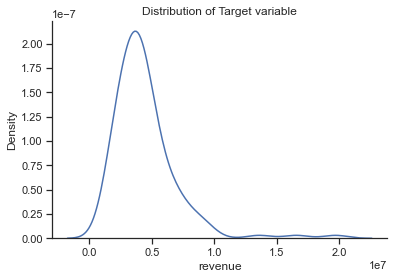

In [12]:
sns.distplot(rp_train['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine(); #to remove top and right spines

In [13]:
rp_train = rp_train[rp_train['revenue']<8e+06].copy() #created a copy of dataset

In [14]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(rp_train.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(rp_test.Type,ax=ax[1])
ax[1].set_title('Test set');

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [15]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([rp_train,rp_test],axis=0)

# Extracting month and year from the date column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


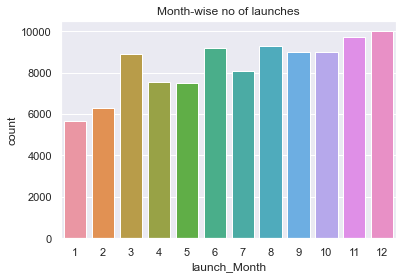

In [16]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches'); #plotting graphs

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


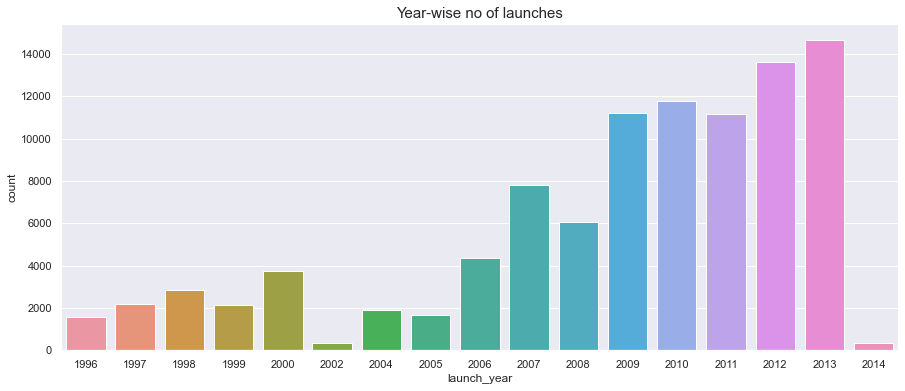

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [18]:
df['Type'].value_counts() #finding data type and count

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [19]:
df['City Group'].value_counts() #finding city groups and count

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [20]:
df['City'].value_counts() #city wise count

İstanbul     34130
Ankara        8739
İzmir         6472
Antalya       5915
Kocaeli       4365
             ...  
Karabük          1
Elazığ           1
Amasya           1
Kastamonu        1
Osmaniye         1
Name: City, Length: 63, dtype: int64

In [21]:
df.drop('City',axis=1,inplace=True)

In [22]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [23]:
df.dropna().groupby('launch_Month')['revenue'].mean() #grouped data by launch month and revenue with mean

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [24]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [25]:
# creating dummy variables
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [26]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [27]:
processed_df.shape,processed_test_data.shape

((128, 70), (100000, 69))

In [28]:
#Check it once
processed_df.head()

City Group  Type  P1   P2   P3   P4  P5  P6  P7  P8  ...  launch_Month_11  \
0           0     1   4  5.0  4.0  4.0   2   2   5   4  ...                0   
1           0     0   4  5.0  4.0  4.0   1   2   5   5  ...                0   
2           1     1   2  4.0  2.0  5.0   2   3   5   5  ...                0   
3           1     1   6  4.5  6.0  6.0   4   4  10   8  ...                0   
4           1     1   3  4.0  3.0  4.0   2   2   5   5  ...                0   

   launch_Month_12  launch_Month_2  launch_Month_3  launch_Month_4  \
0                0               0               0               0   
1                0               1               0               0   
2                0               0               1               0   
3                0               1               0               0   
4                0               0               0               0   

   launch_Month_5  launch_Month_6  launch_Month_7  launch_Month_8  \
0               0               0               1               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               1               0               0               0   

   launch_Month_9  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 70 columns]

In [29]:
#Split train data further into training and testing sets to see performance of each ML model. Then, apply models

In [30]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [31]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [mean_absolute_error(y_test,pred),
                          mean_squared_error(y_test,pred),
                          r2_score(y_test,pred)
                         ]
results

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MAE           MSE  R2-score
Linear Regression        1.904764e+06  5.764211e+12 -1.274732
Logistic Regression      1.302039e+06  2.478689e+12  0.021835
Decision Tree            1.499289e+06  3.315837e+12 -0.308529
Random Forest            1.142406e+06  2.101493e+12  0.170688
Support Vector Machines  1.407327e+06  2.555855e+12 -0.008618
K-nearest Neighbors      1.171290e+06  1.983233e+12  0.217356
XGBoost                  1.057680e+06  1.946986e+12  0.231661

In [32]:
#creating a model
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [.03, 0.05, .07,.09], #so called `eta` value
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.8s
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:   35.9s finished


0.06930389378023838
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}


In [33]:
xgb=XGBRegressor(colsample_bytree=0.7,learning_rate=0.05,max_depth=7,min_child_weight=4,
                n_estimators=500,subsample=0.7)
xgb.fit(X,y)
predicted_test_values = xgb.predict(processed_test_data)
Sub1 = pd.DataFrame(columns=['Id','Prediction'])
Sub1 ['Id'] = rp_test['Id']
Sub1['Prediction'] = predicted_test_values
Sub1.to_csv('submission_xgb.csv',index=False)

In [34]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
predicted_test_values2 = knn.predict(processed_test_data)
Sub2 = pd.DataFrame(columns=['Id','Prediction'])
Sub2['Id'] = rp_test['Id']
Sub2['Prediction'] = predicted_test_values2
Sub2.to_csv('submission_knn.csv',index=False)